<a href="https://colab.research.google.com/github/kf-rahman/UW-stat_courses/blob/main/stat443A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
install.packages("forecast")
install.packages("ggplot2")
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error in find.package(package, lib.loc, verbose = verbose): there is no package called ‘astsa’


In [ ]:
###QUESTION 1

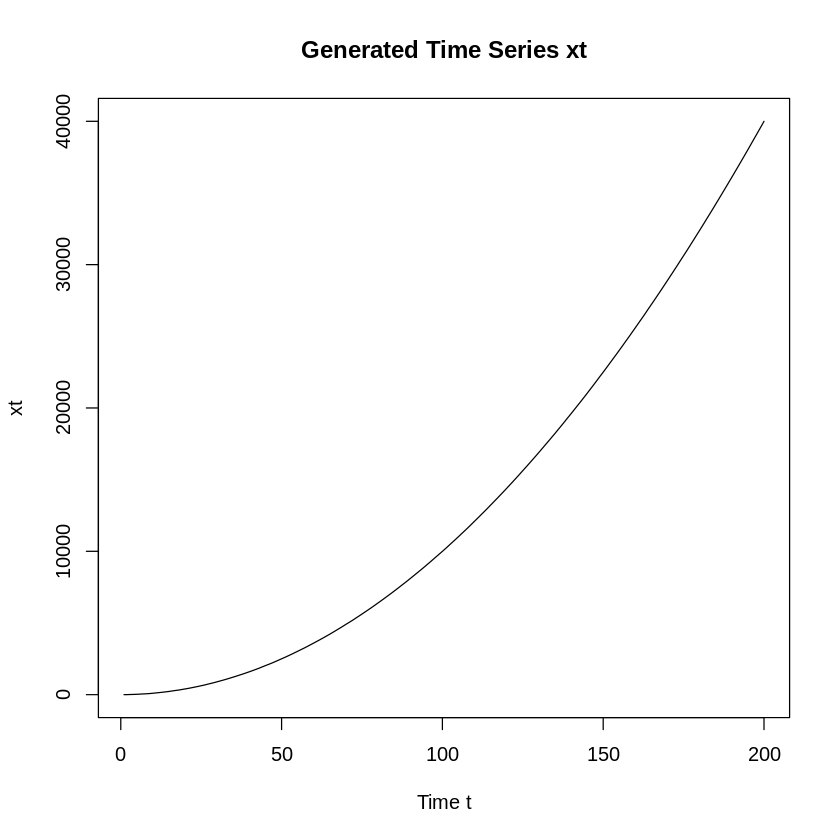

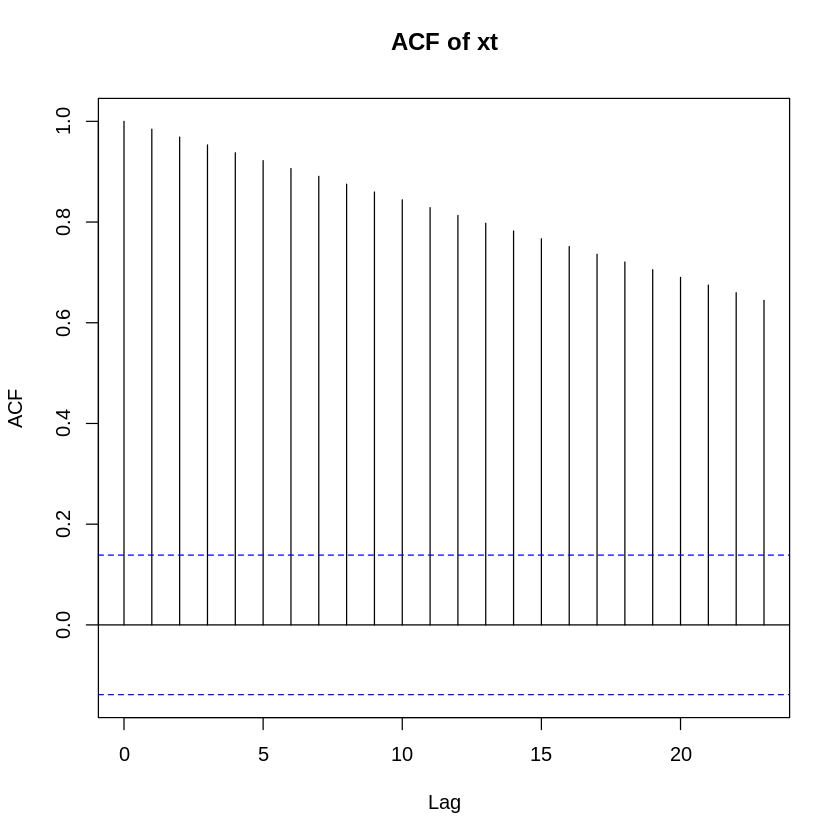

In [28]:
# Setting up the environment
set.seed(123)  # For reproducibility
n <- 200  # Length of the time series

# Generating the time components
t <- 1:n  # Time index
st <- t^2  # Trend component

# Generating the noise components
wt <- rnorm(n, mean = 0, sd = 2)  # Gaussian white noise with variance 4
et <- wt + 0.5 * c(NA, wt[-n])  # NA for the first element to match the lengths
et[1] <- wt[1]  # Handling the NA for wt_0 by assuming wt_0 = wt_1

# Complete time series
xt <- st + et

# Plotting the series
plot(xt, type = "l", main = "Generated Time Series xt", xlab = "Time t", ylab = "xt")

# Plotting the ACF
acf(xt, main = "ACF of xt")


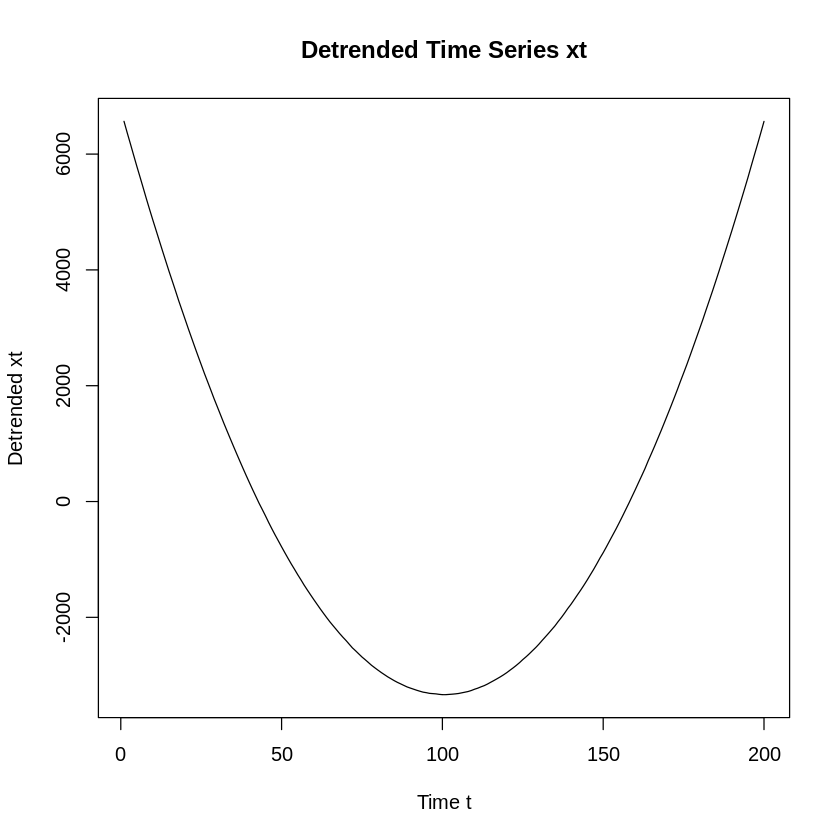

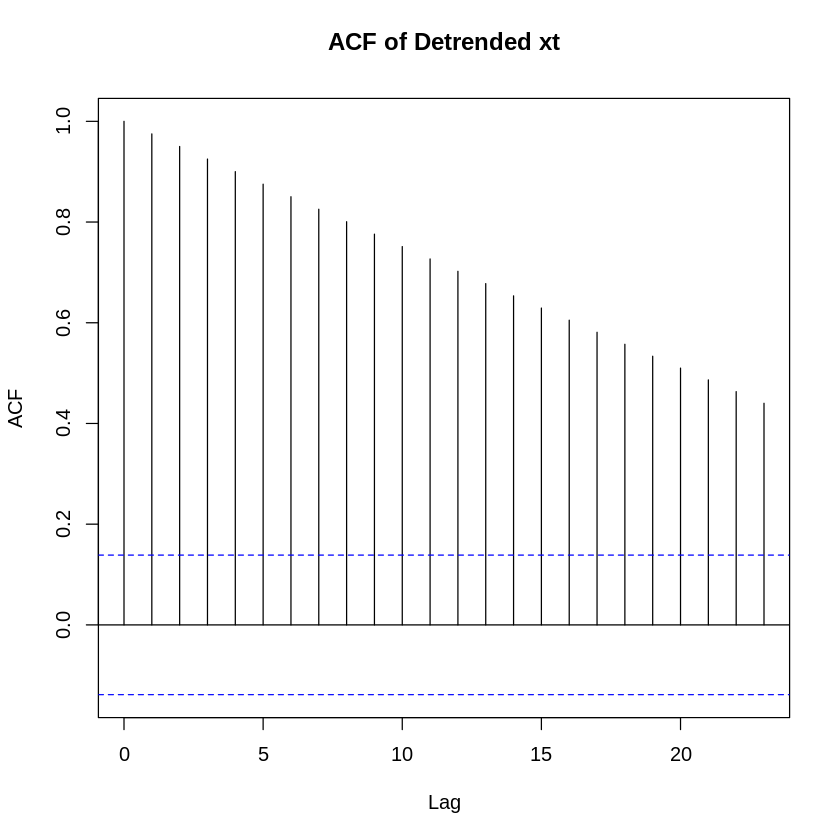

In [29]:
# Fitting a linear model to estimate the trend
trend_model <- lm(xt ~ t)

# Plotting the detrended data
detrended_xt <- xt - predict(trend_model)
plot(detrended_xt, type = "l", main = "Detrended Time Series xt", xlab = "Time t", ylab = "Detrended xt")
acf(detrended_xt, main = "ACF of Detrended xt")


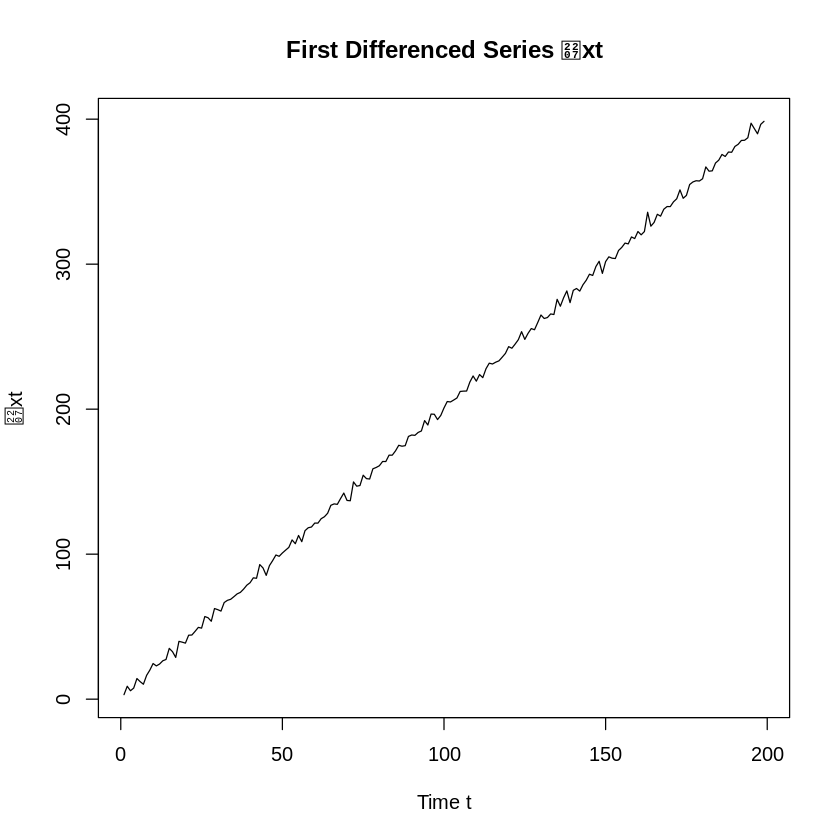

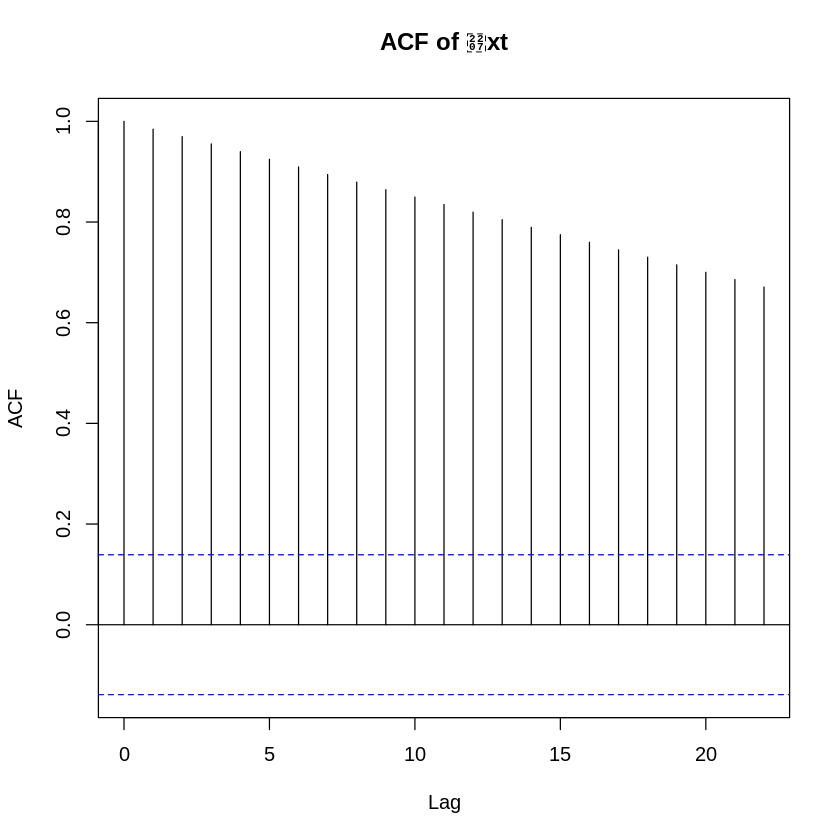

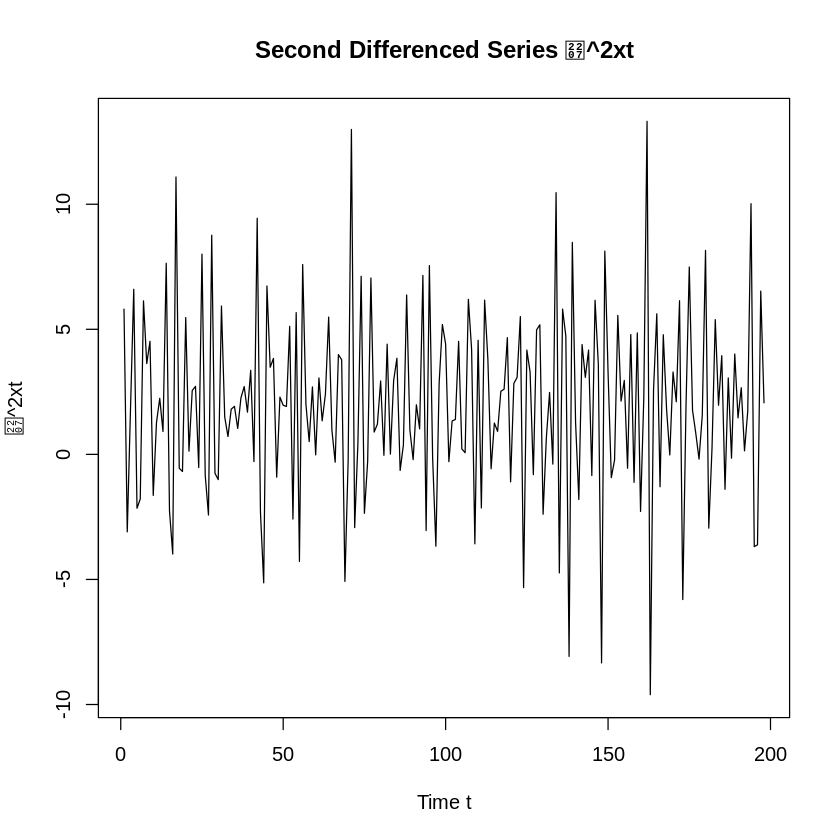

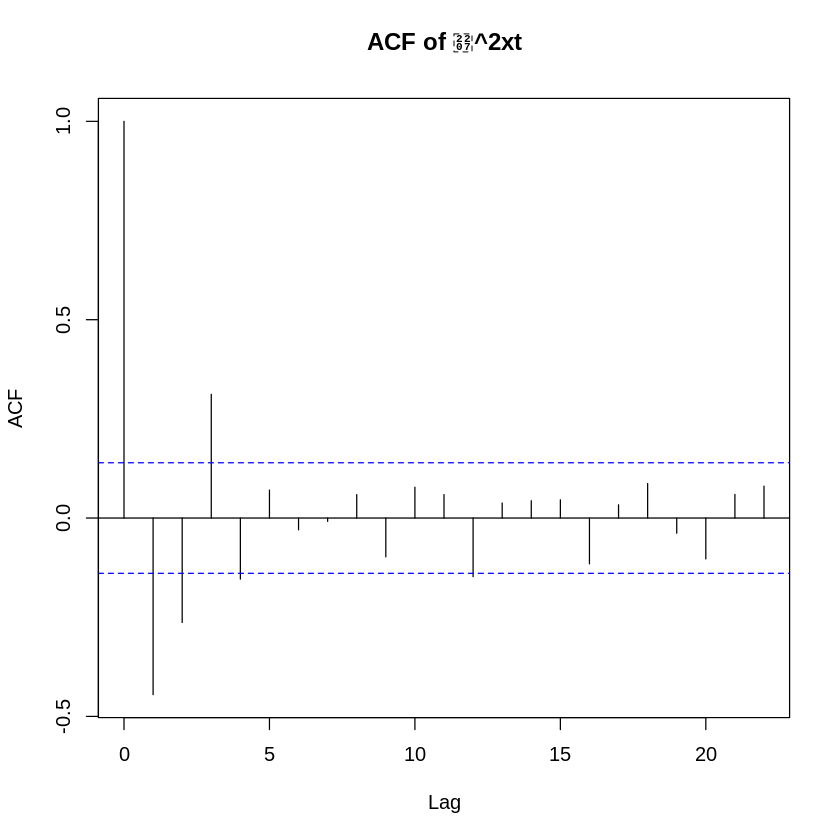

In [30]:
# First difference
dx_xt <- diff(xt, differences = 1)
plot(dx_xt, type = "l", main = "First Differenced Series ∇xt", xlab = "Time t", ylab = "∇xt")
acf(dx_xt, main = "ACF of ∇xt")

# Second difference
dx2_xt <- diff(xt, differences = 2)
plot(dx2_xt, type = "l", main = "Second Differenced Series ∇^2xt", xlab = "Time t", ylab = "∇^2xt")
acf(dx2_xt, main = "ACF of ∇^2xt")


In [ ]:
##QUESTION 3

In [8]:

# Load the data
data <- read.csv("/content/homework1_data.csv")



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


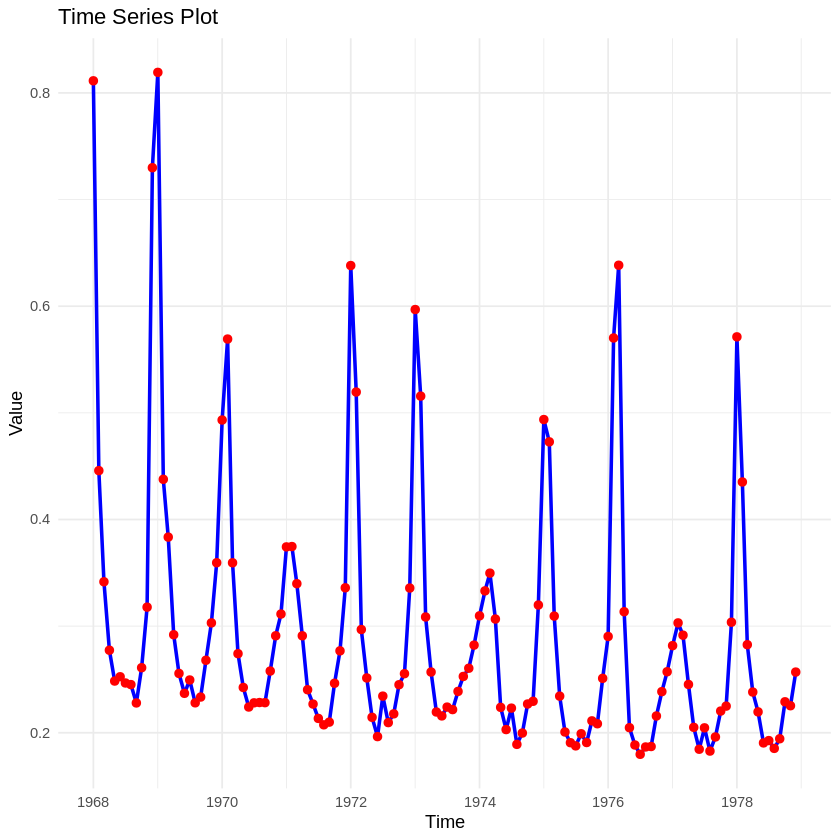

In [17]:
library(tidyverse)
library(ggplot2)
library(lubridate)

# Assuming your 'data' dataframe is already loaded and contains 'Year' and monthly columns

# Convert data from wide to long format
df_long <- pivot_longer(data, cols = -Year, names_to = "Month", values_to = "Value")

# Create a date column assuming the data starts from January of the first year
df_long$Date <- as.Date(paste(df_long$Year, match(df_long$Month, month.abb), "01", sep = "-"), "%Y-%m-%d")

# Arrange by date for time series analysis
df_long <- df_long %>% arrange(Date)

# Convert to time series object, ensuring correct start and frequency
ts_data <- ts(df_long$Value, start = c(min(df_long$Year), 1), frequency = 12)

# Convert the time series object back into a dataframe for ggplot
ts_df <- data.frame(Date = seq(min(df_long$Date), length.out = length(ts_data), by = "month"),
                    Value = as.numeric(ts_data))

# Plot using ggplot
ggplot(data = ts_df, aes(x = Date, y = Value)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 2) +
  labs(x = "Time", y = "Value", title = "Time Series Plot") +
  theme_minimal()


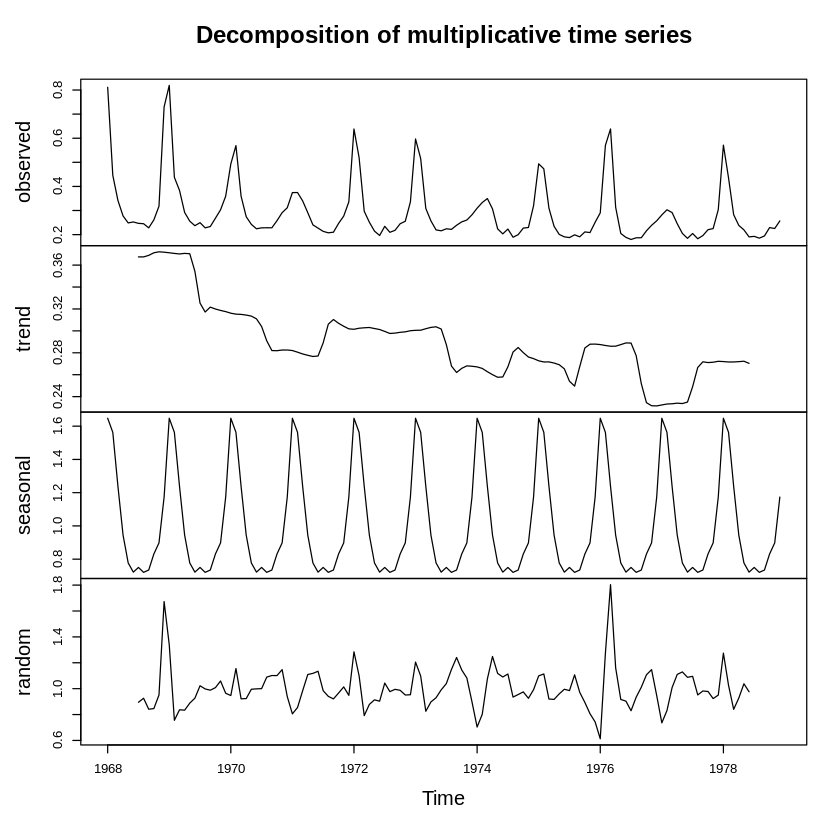

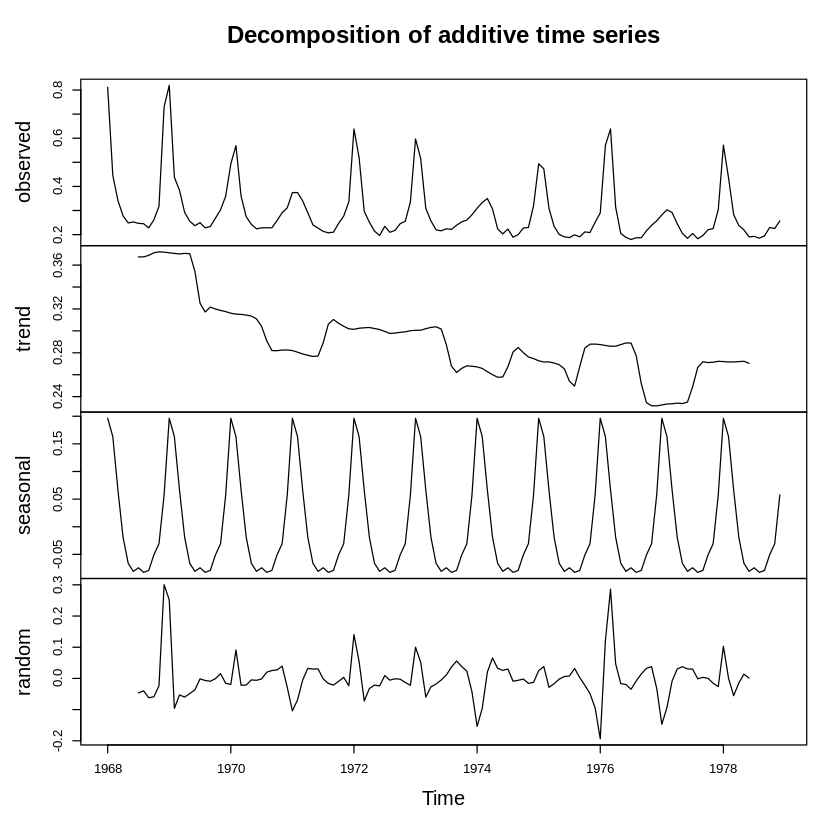

In [19]:

# Decompose the time series
decomposed_mult <- decompose(ts_data, type = "multiplicative")
decomposed_add <- decompose(ts_data, type = "additive")

# Plot the decomposed data
plot(decomposed_mult)
plot(decomposed_add)



Call:
lm(formula = Value ~ Time, data = df_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11652 -0.07402 -0.04307  0.02754  0.47845 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 21.96732    6.55146   3.353  0.00105 **
Time        -0.01098    0.00332  -3.308  0.00121 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1211 on 130 degrees of freedom
Multiple R-squared:  0.07766,	Adjusted R-squared:  0.07057 
F-statistic: 10.95 on 1 and 130 DF,  p-value: 0.001214


`geom_smooth()` using formula = 'y ~ x'


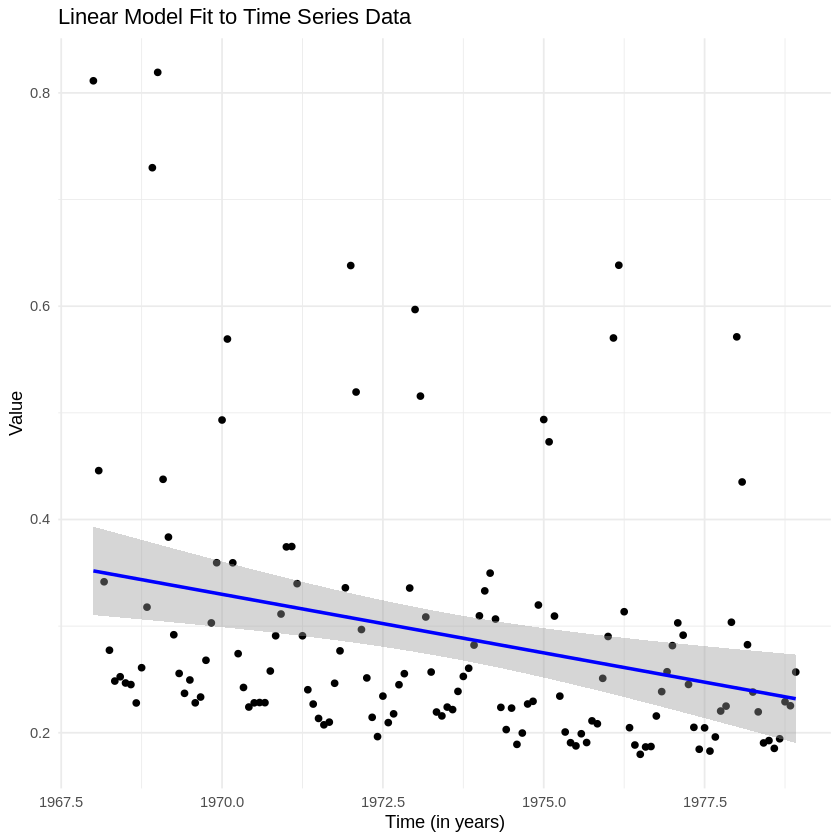

In [20]:
library(lubridate)
library(ggplot2)

# Assuming df_long is already prepared with 'Date' and 'Value'

# Convert Date to a numeric predictor (e.g., time in years)
df_long$Time <- as.numeric(year(df_long$Date)) + (month(df_long$Date) - 1) / 12

# Fit a linear model
model <- lm(Value ~ Time, data = df_long)

# Check the summary of the model
summary(model)

# Plotting the model fit
ggplot(df_long, aes(x = Time, y = Value)) +
  geom_point() +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Linear Model Fit to Time Series Data",
       x = "Time (in years)",
       y = "Value") +
  theme_minimal()


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



ETS(M,Ad,M) 

Call:
 ets(y = ts_data) 

  Smoothing parameters:
    alpha = 1e-04 
    beta  = 1e-04 
    gamma = 2e-04 
    phi   = 0.9778 

  Initial states:
    l = 0.3717 
    b = -0.0027 
    s = 1.1983 0.8714 0.8252 0.7205 0.7189 0.7554
           0.7104 0.7891 0.9444 1.2417 1.5517 1.673

  sigma:  0.1781

       AIC       AICc        BIC 
-132.67650 -126.62340  -80.78606 

Training set error measures:
                       ME       RMSE        MAE      MPE     MAPE     MASE
Training set 0.0004071227 0.06801146 0.03745843 -2.28853 10.13087 0.764918
                  ACF1
Training set 0.3402111

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.0004071227,0.06801146,0.03745843,-2.28853,10.13087,0.764918,0.3402111


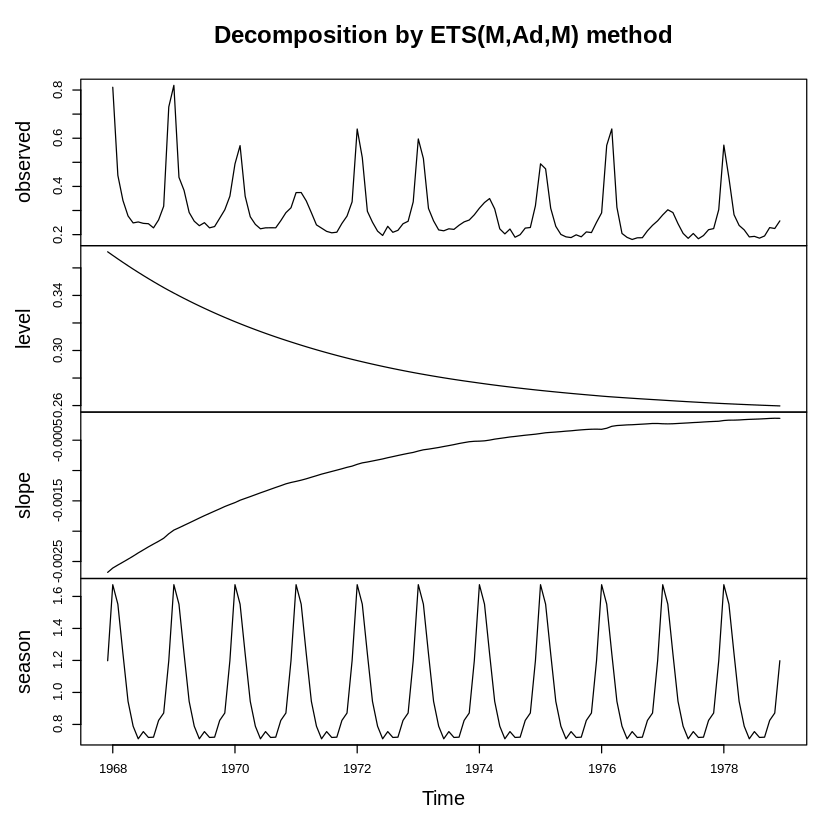

In [22]:
library(forecast)
ets_model <- ets(ts_data)

# Summary of the model
summary(ets_model)

# Plotting the fitted model
plot(ets_model)
lines(fitted(ets_model), col = "red")

# Checking model accuracy
accuracy(ets_model)

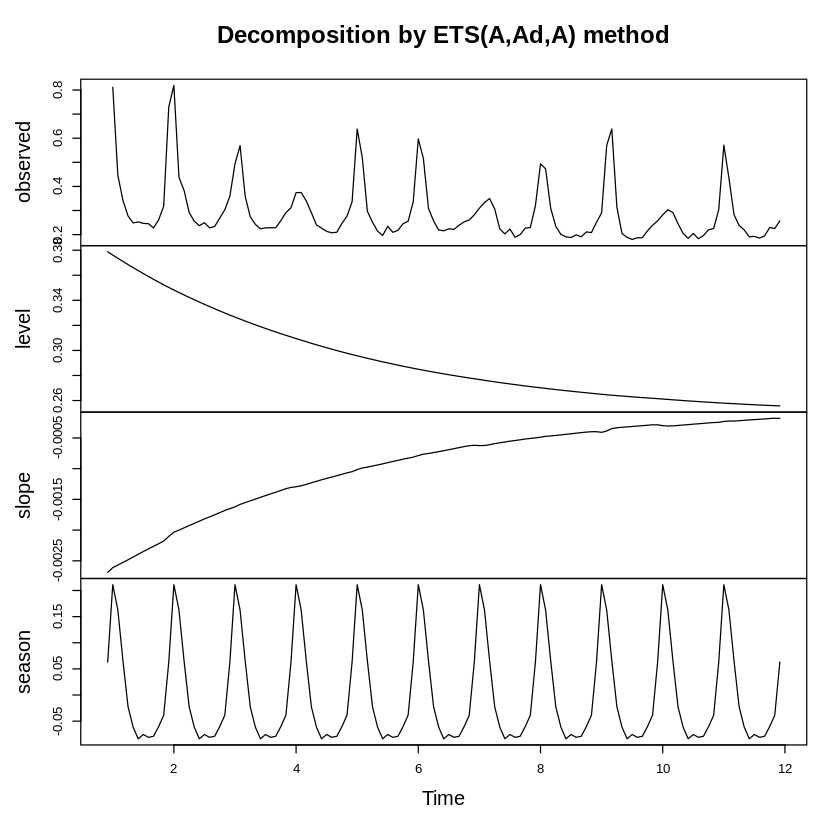

In [26]:
ts_data <- ts(df_long$Value, frequency = 12)

# Fitting an ETS model with automatic model selection
ets_model <- ets(ts_data, model = "AAA")

# Plotting the ETS model fit
plot(ets_model)



ETS(A,Ad,A) 

Call:
 ets(y = ts_data, model = "AAA") 

  Smoothing parameters:
    alpha = 1e-04 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 0.3787 
    b = -0.0027 
    s = 0.0631 -0.0387 -0.0605 -0.079 -0.081 -0.0755
           -0.0838 -0.0614 -0.0223 0.0655 0.1626 0.211

  sigma:  0.0751

      AIC      AICc       BIC 
-21.05875 -15.00566  30.83168 

Training set error measures:
                        ME       RMSE        MAE       MPE     MAPE      MASE
Training set -0.0003552528 0.07012102 0.04064955 -2.249606 11.66937 0.8300821
                  ACF1
Training set 0.3552178


Forecast method: ETS(A,Ad,A)

Model Information:
ETS(A,Ad,A) 

Call:
 ets(y = ts_data, model = "AAA") 

  Smoothing parameters:
    alpha = 1e-04 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 0.3787 
    b = -0.0027 
    s = 0.0631 -0.0387 -0.0605 -0.079 -0.081 -0.0755
           -0.0838 -0.0614 -0.0223 0.0655 0.1626 0.211

  sigma:  0.0751

      AIC      AICc       BIC 
-21.05875 -15.00566  30.83168 

Error measures:
                        ME       RMSE        MAE       MPE     MAPE      MASE
Training set -0.0003552528 0.07012102 0.04064955 -2.249606 11.66937 0.8300821
                  ACF1
Training set 0.3552178

Forecasts:
       Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
Jan 12      0.4665552 0.37027824 0.5628322 0.31931229 0.6137981
Feb 12      0.4179382 0.32166125 0.5142152 0.27069530 0.5651811
Mar 12      0.3206680 0.22439106 0.4169450 0.17342511 0.4679109
Apr 12      0.2326990 0.13642203 0.3289760 0.08545607 0.3799419
May 

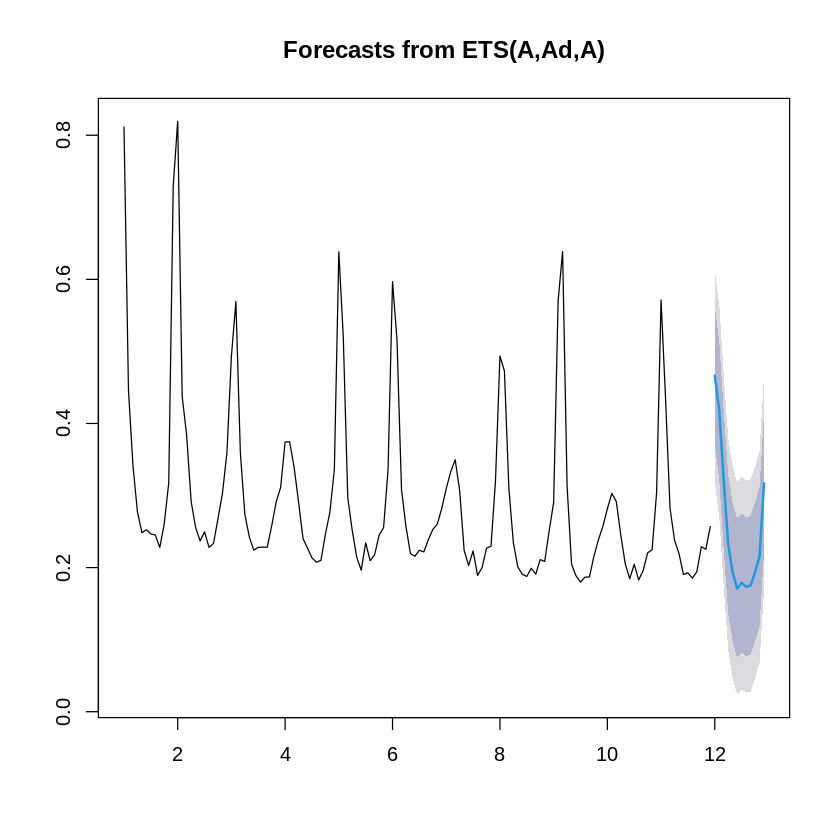

In [27]:
# Forecasting and plotting the next 12 months
future_ets <- forecast(ets_model, h = 12)
plot(future_ets)

# You can look at the summary of the model and forecast
summary(ets_model)
summary(future_ets)